# Analyzing Loan Data from Prosper


### Flow of the notebook
- Introduction
- Gathering Data
- Assesssing Data
- Cleaning Data
- Univariate Exploration
- Bivariate Exploration
- Multivariate Exploration



#### Introduction

This dataset is financial dataset and this is related to the loan, borrowers, lenders, interest rates and stuffs like that. Prosper or Prosper Marketplace Inc. is a San Francisco, California based company specializing in loans at low interest rates to the borrowers. In this dataset, we are using the data from the Posper to analyse it and trying to find the pattern in the Prosper data. This may be tedious because of the sheer size of the dataset and the complicated nature of all the financial datasets. We are using Python libraries to plot some visualizations.

Our investigation will focus on analyzing the factors that affect borrower's APR and What type of loan has been taken by what kind of borrower.



In [2]:
# Let us import all the packages and libraries that will be required in this analysis.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline



In [6]:
from IPython.display import display

pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)

#### Gathering Data

We have downloaded the data from the link given by Udacity. It is downloaded in 'csv' format and we will start by importing it.

In [15]:

df_loan = pd.read_csv('prosperLoanData.csv')
df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [16]:
df_loan.shape

(113937, 81)

Using .shape we can deduce the information about number of rows and columns in the dataset. We see that there are 81 attributes with 113,937 entries.



In [17]:
df_loan.dtypes

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom



#### Assessing and Cleaning Data

**1) What is the structure of Data?**
    - The data consist of a total 81 attributes and accounts for 113,937 entries. Each entry gives us idea about the borrower and it's background and the details of the loan associated with them.
    
**2) What are the main features of your analysis?**
    - The above question is answered by keeping the attributes of concern and removing the others. Done below.
    
**3) Does all the entries have a prosper score associated with it?**

**4) What feature(s) do I think will help most in the analysis of my interest?**
    - I assume that 'Borrower's APR', 'Prosper Rating', and 'Occupation' will play a major role in determining the result of analysis. The answer to this question will be answered in detail by visualization.
    
    

#### Question 3

In [18]:
df_loan = df_loan[df_loan['ProsperScore'].isnull()==False]

df_loan.shape

(84853, 81)

    We can realize that once we get rid of the data that is not associated with prosper score, number of entries gets reduced by a significant number.
    

#### Question 2: What are the main features of your analysis?


In [19]:
'''
There are 2 ways to go about doing this. 1) we select only that we want, & 2) we unselect the ones that we dont want
we will take the second route of unselecting the not-required columns.

 we can check from above the columns that have large amount of null values and remove them since getting that lost 
data is not a possible and become redundant while we analyze.
'''

df_loan_copy = df_loan.copy()

df_loan_copy.drop(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', \
                'ClosedDate', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine',\
                'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',\
                'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate',\
                'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',\
                'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber'], axis=1, inplace = True)

In [20]:
df_loan_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 61 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Term                                84853 non-null  int64  
 1   LoanStatus                          84853 non-null  object 
 2   BorrowerAPR                         84853 non-null  float64
 3   BorrowerRate                        84853 non-null  float64
 4   LenderYield                         84853 non-null  float64
 5   EstimatedEffectiveYield             84853 non-null  float64
 6   EstimatedLoss                       84853 non-null  float64
 7   EstimatedReturn                     84853 non-null  float64
 8   ProsperRating (numeric)             84853 non-null  float64
 9   ProsperRating (Alpha)               84853 non-null  object 
 10  ProsperScore                        84853 non-null  float64
 11  ListingCategory (numeric)           8485

    We see that the dimensions of our copied dataset has reduced in terms of number of attributes since we removed unnecessary columns.
    
    
#### Univariate Exploration


- Which values of APR are most occuring?

In [21]:
df_loan_copy.BorrowerAPR.value_counts().head(10)

0.35797    3672
0.35643    1644
0.30532     902
0.29510     747
0.35356     721
0.15833     651
0.24246     605
0.24758     601
0.12528     559
0.17359     547
Name: BorrowerAPR, dtype: int64

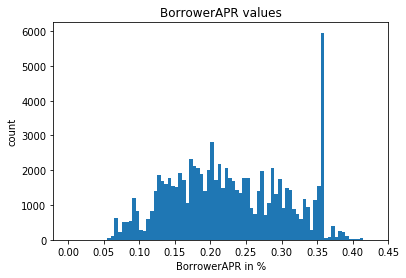

In [22]:
# Lets plot different values of BorrowerAPR

bins = np.arange(0, df_loan_copy['BorrowerAPR'].max(), 0.005)
plt.hist(data = df_loan_copy, x='BorrowerAPR', bins = bins)
plt.title('BorrowerAPR values')
plt.xlabel('BorrowerAPR in %')
plt.ylabel('count')
plt.xticks(np.arange(0, df_loan_copy['BorrowerAPR'].max()+0.05, 0.05));

BorrowerAPR distribution seems fairly normal with mean around ~0.19, with an exception of value ~0.35 which is surprisingly high and this needs to be probed.
    
        
        


- What are the most pursued occupation in our dataset?

Lets see the types of occupation that our borrower are involved in


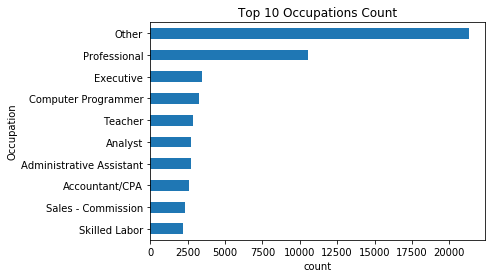

In [24]:
df_loan_copy['Occupation'].value_counts()[9::-1].plot(kind='barh')
plt.title('Top 10 Occupations Count')
plt.xlabel('count')
plt.ylabel('Occupation')
plt.fontsize = 10
plt.figsize=(14,14);

Occupations: We see a huge number of entries as 'Other' and 'Professional', we can deduce that these people are relectant in disclosing their actual professions. The rest of occupation categories are evenly distributed.


- What Prosper scored occurs the most?
    

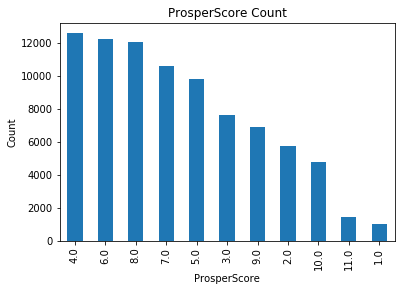

In [26]:
# see which ProsperScore borrowers received the most

df_loan_copy['ProsperScore'].value_counts().plot(kind='bar')
plt.title('ProsperScore Count')
plt.xlabel('ProsperScore')
plt.ylabel('Count')
plt.fontsize = 10
plt.figsize=(14,14);

ProsperScore : Upon inspection we can say that more the money you borrow, the lesser ProsperScore you get.


- Let us explore the mean values of ProsperScore by each occupation.

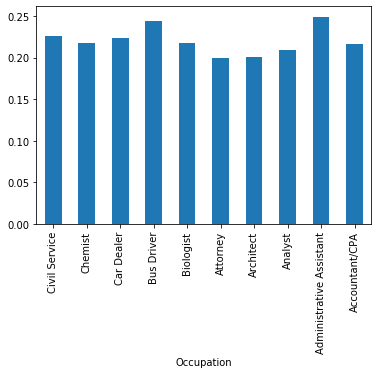

In [27]:
# bar plot for APR means of top 10 occupations.

top_10 = df_loan_copy.groupby('Occupation').BorrowerAPR.mean()[9::-1]
top_10.plot(kind='bar');

We can observe that there is negligible difference between mean APR scores of top 10 occupations. Hence this exploration is not substantial. We can consider that Occupation might not be the most appropriate attribute in our analysis.


- Lets put some light on delinquencies from past.




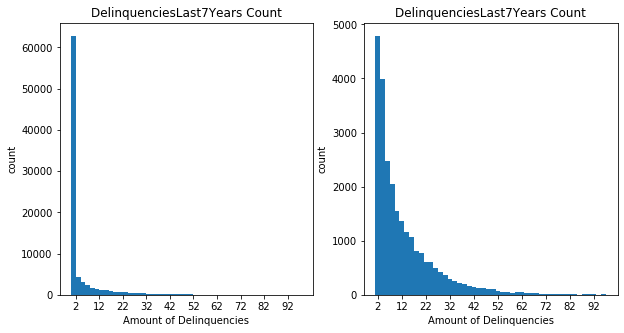

In [44]:
plt.figure(figsize = [10, 5]) 


plt.subplot(1, 2, 1)
bins = np.arange(0, df_loan_copy['DelinquenciesLast7Years'].max(), 2)
plt.hist(data = df_loan_copy, x = 'DelinquenciesLast7Years', bins = bins)
plt.xticks(np.arange(2, 100+1, 10))
plt.title('DelinquenciesLast7Years Count')
plt.xlabel('Amount of Delinquencies')
plt.ylabel('count');

plt.subplot(1, 2, 2)
bins = np.arange(1, df_loan_copy['DelinquenciesLast7Years'].max(), 2)
plt.hist(data = df_loan_copy, x = 'DelinquenciesLast7Years', bins = bins)
plt.xticks(np.arange(2, 100+1, 10))
plt.title('DelinquenciesLast7Years Count')
plt.xlabel('Amount of Delinquencies')
plt.ylabel('count');

DelinquenciesLast7Years : The first plot shows overall delinquencies and we can infer that most of the borrowers dont have any delinquency. But, as we remove those records where there is no delinquency, the spread becomes more distributed and the decrease is gradual.



####  Bivariate Exploration

- Let us check for BorrowerAPR mean by ProsperRating mean


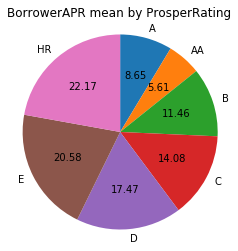

In [30]:
# lets try and plot a Pie-plot 

ProsperRating_mean = df_loan_copy.groupby('ProsperRating (Alpha)').BorrowerAPR.mean()
ProsperRating_mean

plt.pie(ProsperRating_mean, labels = ProsperRating_mean.index, startangle = 90,
    counterclock = False, autopct='%1.2f')
plt.axis('square') 
plt.title('BorrowerAPR mean by ProsperRating');

BorrowerAPR mean by ProsperRating : The ProsperRating categories have been labelled from highest to lowest manner (i.e. AA, A, B, C, D, E, HR). We can observe that the highest rating of AA has received lowest mean APR and vice-versa, i.e. lowest ratings have received highest mean APR. This is somewhat intuitive because better ratings induce more trust in customer and hence in case of any default also, the punishment in terms of APR is low.


- Comparing CreditScoreRangeLower & CreditScoreRangeUpper

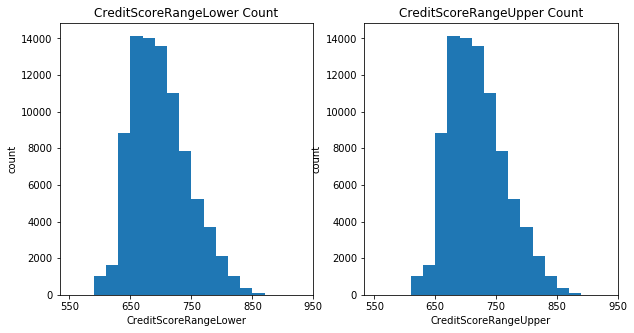

In [45]:
plt.figure(figsize = [10, 5]) 


plt.subplot(1, 2, 1)
bins = np.arange(550, df_loan_copy['CreditScoreRangeLower'].max(), 20)
plt.hist(data = df_loan_copy, x = 'CreditScoreRangeLower', bins = bins)
plt.xticks(np.arange(550, 1000, 100))
plt.title('CreditScoreRangeLower Count')
plt.xlabel('CreditScoreRangeLower')
plt.ylabel('count');

plt.subplot(1, 2, 2)
bins = np.arange(550, df_loan_copy['CreditScoreRangeUpper'].max(), 20)
plt.hist(data = df_loan_copy, x = 'CreditScoreRangeUpper', bins = bins)
plt.xticks(np.arange(550, 1000, 100))
plt.title('CreditScoreRangeUpper Count')
plt.xlabel('CreditScoreRangeUpper')
plt.ylabel('count');

In [32]:
display(df_loan_copy.CreditScoreRangeLower.describe())

count    84853.000000
mean       699.390240
std         47.095937
min        600.000000
25%        660.000000
50%        700.000000
75%        720.000000
max        880.000000
Name: CreditScoreRangeLower, dtype: float64

In [33]:
display(df_loan_copy.CreditScoreRangeUpper.describe())

count    84853.000000
mean       718.390240
std         47.095937
min        619.000000
25%        679.000000
50%        719.000000
75%        739.000000
max        899.000000
Name: CreditScoreRangeUpper, dtype: float64

CreditScoreRangeLower & CreditScoreRangeLower : The plots are quiet similar and nothing substantial to differentiate.


- Let's see how the AvailableBankcardCredit is distributed.

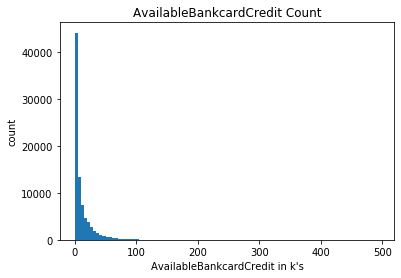

In [34]:
bins = np.arange(0, df_loan_copy['AvailableBankcardCredit'].max(), 5000)
plt.hist(data = df_loan_copy, x = 'AvailableBankcardCredit', bins = bins)
plt.xticks([0, 1e5, 2e5, 3e5, 4e5, 5e5], [0, '100', '200', '300', '400', '500'])
plt.title('AvailableBankcardCredit Count')
plt.xlabel("AvailableBankcardCredit in k's")
plt.ylabel('count');

We can see that the plot above is not so informative. We can improve upon the filters and then try to re-plot so as to get a better glimps of the distribution.

In [36]:
# let us set a baseline of 150,000
High_Creditavailible = df_loan_copy[df_loan_copy['AvailableBankcardCredit'] > 150000]
High_Creditavailible.AvailableBankcardCredit.sort_values(ascending = False)

80178     498374.0
92406     432613.0
98518     413367.0
99673     412785.0
64246     406125.0
41112     403880.0
86383     403534.0
45212     395500.0
58930     373348.0
38163     364284.0
56942     360000.0
39963     360000.0
43607     360000.0
61020     360000.0
76296     360000.0
1801      360000.0
32553     350777.0
99273     305996.0
43998     302928.0
8352      285475.0
69640     273978.0
84947     267126.0
49365     265757.0
68191     264939.0
80379     256031.0
24958     246231.0
27990     241928.0
41929     238114.0
44416     237704.0
64323     228829.0
31141     227347.0
85922     225413.0
54325     223896.0
73613     217557.0
54038     217349.0
18457     217218.0
111386    215434.0
23693     213800.0
106726    212800.0
49261     212613.0
7337      210764.0
94729     206964.0
63908     206000.0
74369     204322.0
40041     203472.0
7448      202528.0
65874     202397.0
17455     201674.0
24493     200395.0
62779     195685.0
110598    194405.0
87618     190480.0
73521     18

In [37]:
print(len(High_Creditavailible['AvailableBankcardCredit']))

# remove fewer people who has high Creditavailible
df_loan_1 = df_loan_copy.drop(High_Creditavailible.index)

# check
print(len(df_loan_1[df_loan_1['AvailableBankcardCredit'] > 150000]))

113
0


Now that we have removed all the entries beyond the bracket and hence we can go on to plot again

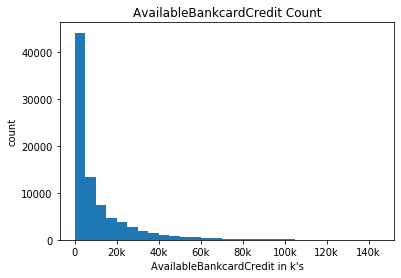

In [38]:
bins = np.arange(0, df_loan_1['AvailableBankcardCredit'].max(), 5000)
plt.hist(data = df_loan_1, x = 'AvailableBankcardCredit', bins = bins)
plt.xticks([0, 2e4, 4e4, 6e4, 8e4, 1e5, 1.2e5, 1.4e5],
           [0, '20k', '40k', '60k', '80k', '100k', '120k', '140k'])
plt.title('AvailableBankcardCredit Count')
plt.xlabel("AvailableBankcardCredit in k's")
plt.ylabel('count');

We can clearly see that the above plot now shows how the Available Bankcard Credit is distributed in more detail.


#### While performing this basic analysis, did you find any feature or attribute to be behaving unusually?
    Yes, features like Occupation truned out to give no significant idea about how it is affecting Borrower's APR. In real, occupation can be generalized to give a sense of background and income which indirectly affects APR but from the above preliminary analysis, we cannot say so.
    
    

#### Multivariate Exploration


- Lets see how the attributes are influencing each other and also how are they correlated using the Correlation plot.


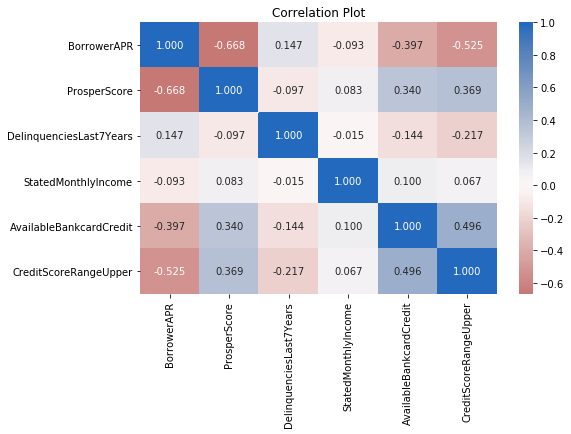

In [41]:
col_cor = ['BorrowerAPR', 'ProsperScore', 'DelinquenciesLast7Years', \
          'StatedMonthlyIncome', 'AvailableBankcardCredit', 'CreditScoreRangeUpper']

plt.figure(figsize = [8, 5])
sns.heatmap(df_loan_1[col_cor].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot') 
plt.show();

The correlations are mostly negative and that can be understood and also is justified. The highest negative correlation is between 'ProsperScore' and 'BorrowerAPR', which should be true because higher the prosperscore, higher will be the trust in customer and his ability to repay the dues hence they are inversely proportional or negatively correlated. Same relation can be seen in Credit Score and BorrowerAPR also.


   - lets have a look at scatter plots for these variables.

Text(0.5, 1, 'Matrix Plot')

<Figure size 720x360 with 0 Axes>

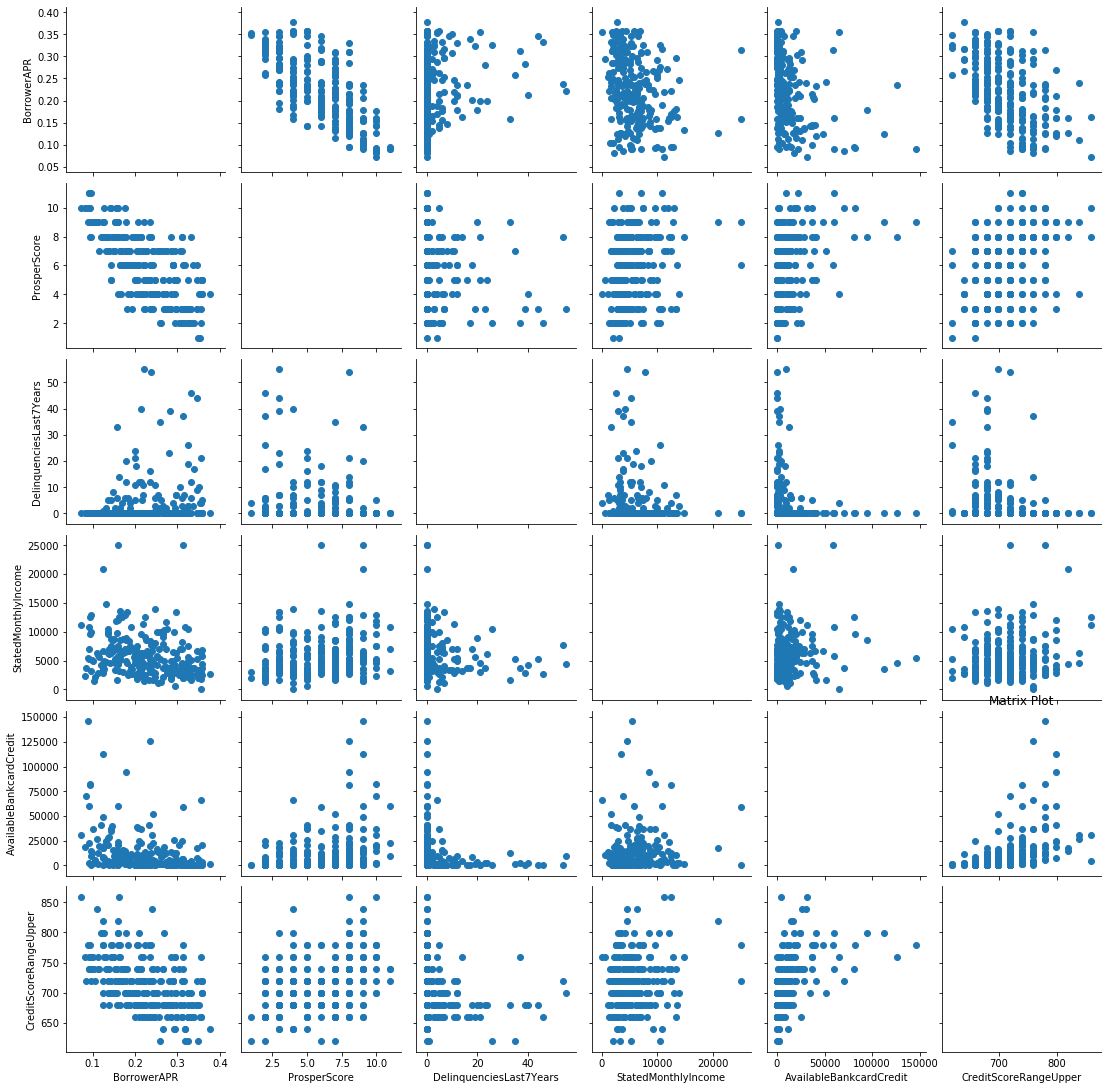

In [47]:
# plot matrix: only 250 random loans are used to see the pattern more clearer
plt.figure(figsize = [10, 5]) 


col_cor = ['BorrowerAPR', 'ProsperScore', 'DelinquenciesLast7Years', 
            'StatedMonthlyIncome', 'AvailableBankcardCredit', 'CreditScoreRangeUpper']

sample = np.random.choice(df_loan_1.shape[0], 250, replace = False)
loan_samp = df_loan_1.iloc[sample,:]

g = sns.PairGrid(data = loan_samp, vars = col_cor)
g.map_offdiag(plt.scatter)
plt.title('Matrix Plot')


The Matrix plot also turns out to be similar to the correlation plot in determining which attributes have positive and which attributes have negative correlation. We can deduce that ProsperScore has most negative correlation with BorrowerAPR, we can try and analyze it better by explicitely plotting them in different and more informative manner.

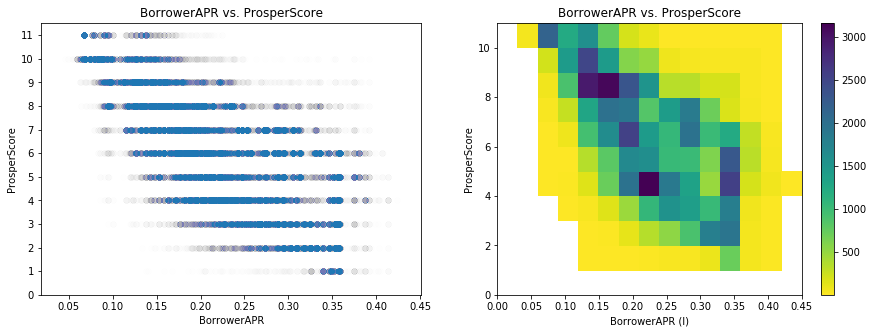

In [48]:
# scatter and heat plot for comparing ProsperScore and BorrowerAPR. 
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = df_loan_1, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore')


plt.subplot(1, 2, 2)
bins_x = np.arange(0, df_loan_1['BorrowerAPR'].max()+0.05, 0.03)
bins_y = np.arange(0, df_loan_1['ProsperScore'].max()+1, 1)
plt.hist2d(data = df_loan_1, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR (l)')
plt.ylabel('ProsperScore');

Our assumtion is likely to be true about both of these variables being Negatively correlated.


- Let us plot a similar scatter plot and heat map for other 2 variable i.e. BorrowerAPR and CreditScoreRangeUpper

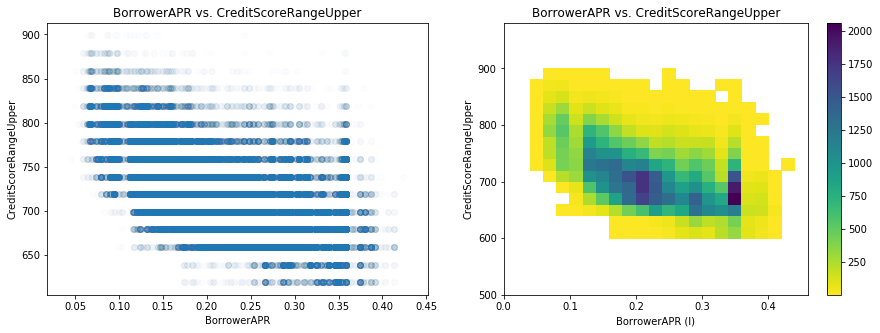

In [58]:
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = df_loan_1, y = 'CreditScoreRangeUpper', x = 'BorrowerAPR', alpha = 0.01)
plt.title('BorrowerAPR vs. CreditScoreRangeUpper')
plt.xlabel('BorrowerAPR')
plt.ylabel('CreditScoreRangeUpper');


plt.subplot(1, 2, 2)
bins_x = np.arange(0, df_loan_copy['BorrowerAPR'].max()+0.05, 0.02)
bins_y = np.arange(500, df_loan_copy['CreditScoreRangeUpper'].max()+100, 20)
plt.hist2d(data = df_loan_1, x = 'BorrowerAPR', y = 'CreditScoreRangeUpper', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. CreditScoreRangeUpper')
plt.xlabel('BorrowerAPR (l)')
plt.ylabel('CreditScoreRangeUpper');


The above plot makes sense because the higher the Credit Score, the lower will be the BorrowerAPR. The Credit Score also is positively correlated with the ProsperScore.


- Lets try to plot relation between BorrowerAPR and ProsperScore & ProsperRating. The primary focus while doing this viz is to uncover some information that might not be visible using the above plotted plots.


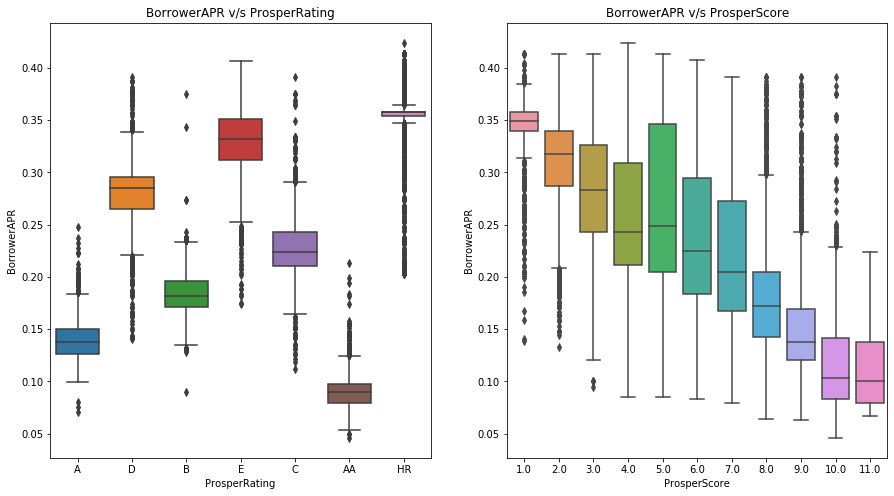

In [57]:
plt.figure(figsize = [20, 10]) 

plt.subplot(1, 2, 1)
sns.boxplot(data = df_loan_copy, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR')
plt.gcf().set_size_inches(15, 8)
plt.title('BorrowerAPR v/s ProsperRating')
plt.xlabel('ProsperRating')
plt.ylabel('BorrowerAPR')

plt.subplot(1, 2, 2)
sns.boxplot(data = df_loan_copy, x = 'ProsperScore', y = 'BorrowerAPR')
plt.gcf().set_size_inches(15, 8)
plt.title('BorrowerAPR v/s ProsperScore')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

The Violin plot for BorrowerAPR and ProsperRating & ProsperScore gives us the idea that ProsperRating cannot substantially help in seeing how it affects the BorrowerAPR. ProsperScore plot clearly shows a negative correlation with the BorrowerAPR.


#### What are some of the relationships of our interest and what is their nature?

    - The plots above have revealed 2 features / attributes having a relationship of our interest and should be probed for further insights.
    - We can say that ProsperScore and CreditScoreRangeUpper, both, have a negative correlation to the BorrowerAPR. A probable reason for such behavior are mentioned below each of the plots.
    
    
- We will utilize these variables to try 2 kinds of plot and try and implement Multivariate Visualization

#### Multivariate Exploration

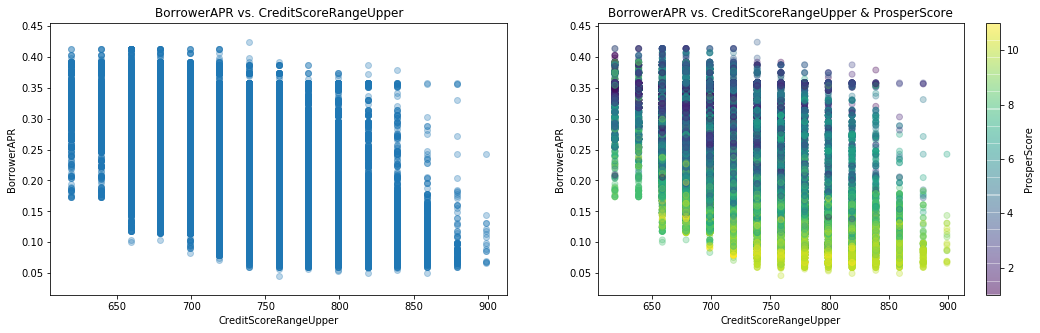

In [63]:
# Lets us try and implement these 3 variables together.

plt.figure(figsize = [18, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = df_loan_1, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', alpha = 0.3)
plt.title('BorrowerAPR vs. CreditScoreRangeUpper')
plt.ylabel('BorrowerAPR')
plt.xlabel('CreditScoreRangeUpper');


plt.subplot(1, 2, 2)
plt.scatter(data = df_loan_1, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', c ='ProsperScore', alpha = 0.3)
plt.colorbar(label = 'ProsperScore')
plt.title('BorrowerAPR vs. CreditScoreRangeUpper & ProsperScore')
plt.ylabel('BorrowerAPR')
plt.xlabel('CreditScoreRangeUpper');

- Here we start by plotting two variables at first and then try to include third variable in the same plot to get a multivariate visualization
- The negative correlations (BorrowerAPR and ProsperScore & BorrowerAPR and CreditScoreRangeUpper) is visible from second plot itself.
- As the Credit Score Range goes higher, the BorrowerAPR can be seen decreasing.
- Similarly, with lower ProsperScore (i.e. bluish dots) the BorrowerAPR stays higher or on top of the plot unlike the yellow dots including lower BorrowerAPR and at the same time also some positive correlation with Credit Score.


    Let's try and use FacetGrid() to do a similar multivariate visual

/Users/parthpatel/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


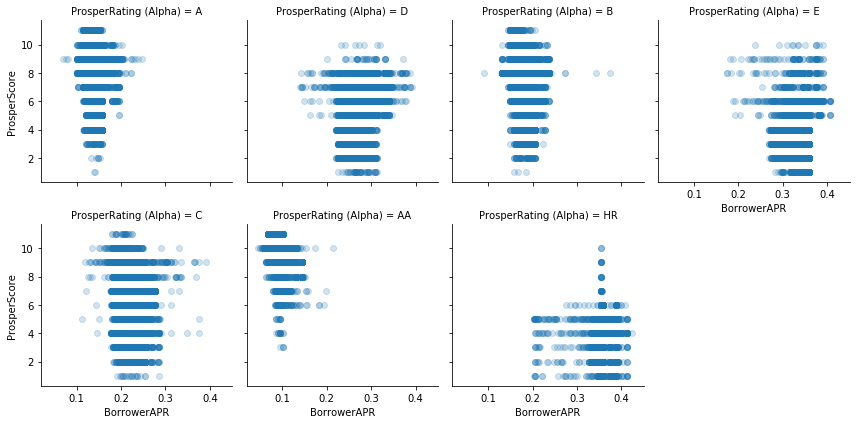

In [64]:
viz = sns.FacetGrid(data= df_loan_1, col='ProsperRating (Alpha)', col_wrap=4, size=3)
viz.map(plt.scatter, 'BorrowerAPR', 'ProsperScore', alpha= 0.2)
viz.set_xlabels('BorrowerAPR')
viz.set_ylabels('ProsperScore')

plt.show();

This plot shows us the correlation between BorrowerAPR and ProsperScore for each of the ProsperRating individually. We can deduce that the ProsperRating categories would not have any pattern of correlation with BorrowerAPR. But we can deduce that the people with lower ratings usually tend to have a higher APR and which can be true in real world too.